## Using Decision Tree and Random Forest for Digits Classification
Remember the MNIST dataset used in the Classification Exercise - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model hyperparameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).

**Questions:**

**1.** Choose which model hyperparameters (2-3) you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest. **DO NOT forget to create a validation set for this experiment**


In [1]:
# your code here
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
mnist = fetch_openml('mnist_784', version=1, return_X_y=True, parser = 'pandas')
X_train,X_temp,y_train,y_temp = train_test_split(mnist[0],mnist[1], test_size = 0.4, random_state = 42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp, test_size = 0.5, random_state = 42)

In [3]:
tree_class = DecisionTreeClassifier(max_depth = 20,min_samples_split = 50)
tree_class.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=20, min_samples_split=50)

In [4]:
y_pred = tree_class.predict(X_val)

In [5]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1359
           1       0.91      0.96      0.93      1552
           2       0.81      0.82      0.82      1403
           3       0.80      0.81      0.80      1392
           4       0.83      0.86      0.85      1322
           5       0.82      0.79      0.81      1295
           6       0.90      0.87      0.89      1415
           7       0.89      0.88      0.89      1497
           8       0.78      0.77      0.78      1346
           9       0.84      0.80      0.82      1419

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000



In [6]:
tree_class.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

After running multiples times and with various values, we find that max_depth = 20 and min_samples_split=50 seems to be the most appropriate values for our parameters. We can see on feature_importances that many features are not taken into consideration and useless for our split. So we want to reduce the depth of the tree to lower the complexity of our model. Moreover, we do not want our model to overfit so we set the min_samples_split to 50 to limit overfitting.

In [7]:
rf = RandomForestClassifier(max_depth = 15, min_samples_split = 50, n_estimators = 40)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_val)

In [8]:
print(classification_report(y_val,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1359
           1       0.97      0.98      0.98      1552
           2       0.93      0.96      0.94      1403
           3       0.93      0.92      0.93      1392
           4       0.96      0.94      0.95      1322
           5       0.94      0.94      0.94      1295
           6       0.97      0.98      0.97      1415
           7       0.96      0.94      0.95      1497
           8       0.93      0.92      0.93      1346
           9       0.92      0.93      0.92      1419

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



To limit overfitting, we set n_estimators = 40 to limit the number of trees in the forest.
As we have a lot of features, we limit the depth of the tree to be 15.
As we want to limit the impact of outliers and limit overfitting, we set the minimum number of samples to 50 to split.

**2.** Once you are satisfied with the model hyperparameters, plot for each of the models (a single decision tree and random forest) the importance of each of the pixels to the final decision. The end result should be an image that looks like a heatmap, that shows the most important pixels in the decision. **Explain the result**


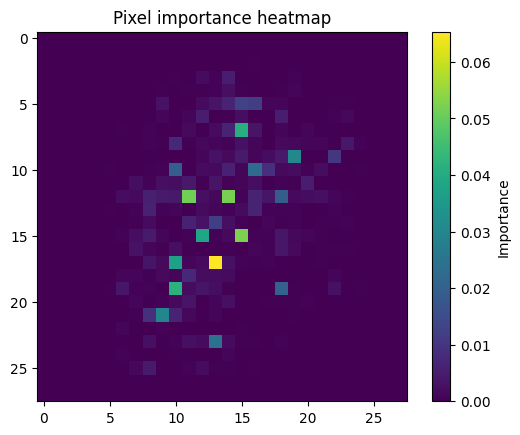

In [9]:
plt.imshow(np.reshape(tree_class.feature_importances_,(28,28)))
plt.title('Pixel importance heatmap')
plt.colorbar(label = 'Importance')
plt.show()

For the decision tree model,we can see that most of the pixels are useless in our model. For pixels between 100 and 300, we can see on the plot that a few pixels are important.

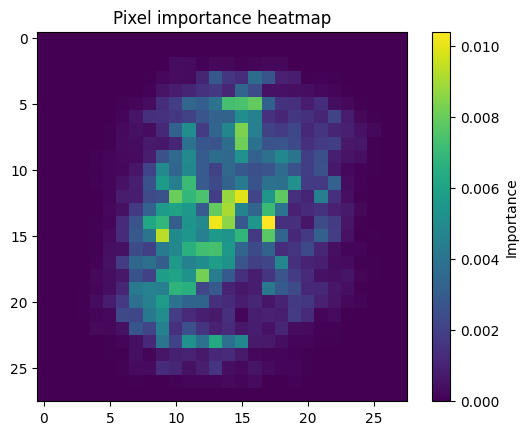

In [10]:
plt.imshow(np.reshape(rf.feature_importances_,(28,28)))
plt.title('Pixel importance heatmap')
plt.colorbar(label = 'Importance')
plt.show()

For the RandomForest model, we can see on the plot that many pixels have an importance. Pixels between 150 and 250 tends to have the more importance.

We can notice that on the decisiontree classifier, most of the features are ignored whereas on the randomforest classifier, most of the features are taken into consideration.

**3.** Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
Print, regardless of the digit, the mean +- std for the correctly classified samples, and the mean +- std for the misclassified samples.

*The end result should look like:*

Error class probability: mean_proba (+/- std_proba)
Correct class probability: mean_proba (+/- std_proba)



In [11]:
# your code here
y_pred_test_tc = tree_class.predict(X_test)

In [12]:
mean_proba_correct_tc =(y_test == y_pred_test_tc).mean()
std_proba_correct_tc =(y_test == y_pred_test_tc).std()

In [13]:
mean_proba_error_tc = (y_test != y_pred_test_tc).mean()
std_proba_error_tc = (y_test != y_pred_test_tc).mean()

In [14]:
print(f'Error class probability : {mean_proba_error_tc.round(3)} (+/- {std_proba_error_tc.round(3)}) Correct class probability : {mean_proba_correct_tc.round(3)} (+/- {std_proba_correct_tc.round(3)})')

Error class probability : 0.153 (+/- 0.153) Correct class probability : 0.847 (+/- 0.36)


In [15]:
y_pred_test_rf = rf.predict(X_test)

In [16]:
mean_proba_correct_rf =(y_test == y_pred_test_rf).mean()
std_proba_correct_rf =(y_test == y_pred_test_rf).std()

In [17]:
mean_proba_error_rf =(y_test != y_pred_test_rf).mean()
std_proba_error_rf =(y_test != y_pred_test_rf).std()

In [18]:
print(f'Error class probability : {mean_proba_error_rf.round(3)} (+/- {std_proba_error_rf.round(3)}) Correct class probability : {mean_proba_correct_rf.round(3)} (+/- {std_proba_correct_rf.round(3)})')

Error class probability : 0.052 (+/- 0.222) Correct class probability : 0.948 (+/- 0.222)


**4.** Discuss your results.

Our result are much better for the randomforest classifier than the decisiontree classifier.
We get an error class for the decisiontree 3 times higher than the randomforest.